In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
folder_imgs_path = '/content/drive/MyDrive/Large vision/CLIP_MODEL_ImageSearch/images'

In [ ]:
pip install transformers


In [12]:
from transformers import CLIPProcessor, CLIPModel
import torch ##برمجة الشبكات العصابية والتعلم العميق
from PIL import Image # PIL python Imageing libaray for dealing with images like openCV


model_name = 'openai/clip-vit-base-patch32'

In [13]:
model = CLIPModel.from_pretrained(model_name)
processor = CLIPProcessor.from_pretrained(model_name)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [14]:
folder_imgs_path = '/content/drive/MyDrive/Large vision/CLIP_MODEL_ImageSearch/images/'
import os

images_file = [os.path.join(folder_imgs_path, file) for file in os.listdir(folder_imgs_path) if file.endswith(('.png','.jpg','.jpeg'))]
images = [Image.open(file) for file in images_file]

In [15]:
target_img_path = '/content/drive/MyDrive/Large vision/CLIP_MODEL_ImageSearch/images/cat1.jpg'

In [16]:
target_img = Image.open(target_img_path)

In [4]:
def extract_features(imgs):
  inputs = processor(images = imgs, return_tensors = "pt", padding = True)
  with torch.no_grad():
    features = model.get_image_features(**inputs)
  return features


In [17]:
target_features = extract_features([target_img])
images_features = extract_features(images)

In [18]:
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(target_features, images_features).flatten()

indices = similarity.argsort()[::-1]

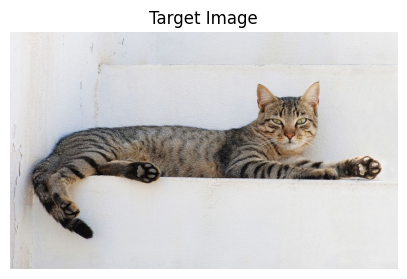

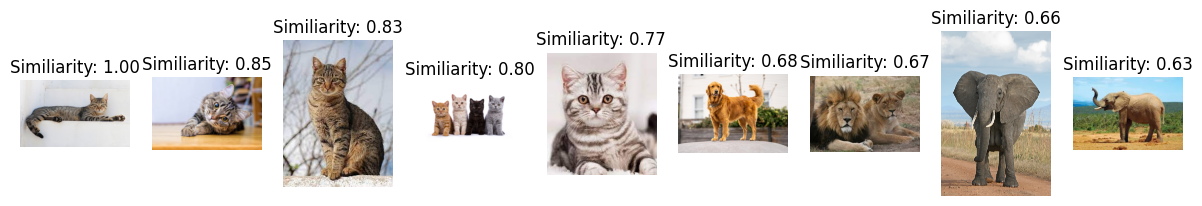

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize = (5, 5))
plt.imshow(target_img)
plt.title('Target Image')
plt.axis('off')
plt.show()


plt.figure(figsize = (15, 5))
for i , idx in enumerate(indices):
  plt.subplot(1, len(images), i + 1)
  plt.imshow(images[idx])
  plt.title(f'Similiarity: {similarity[idx]:.2f}')
  plt.axis('off')

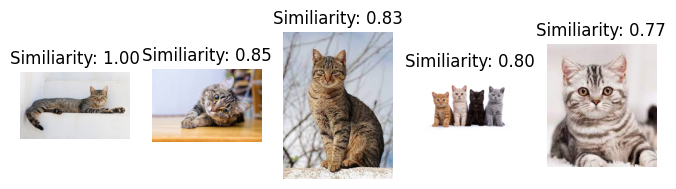

In [22]:
threshold = 0.75
filtered_indices = [i for i, sim in enumerate(similarity) if sim >= threshold]

filtered_indices = sorted(filtered_indices, key = lambda i: similarity[i], reverse =True)

plt.figure(figsize = (15, 5))
for i , idx in enumerate(filtered_indices):
  plt.subplot(1, len(images), i + 1)
  plt.imshow(images[idx])
  plt.title(f'Similiarity: {similarity[idx]:.2f}')
  plt.axis('off')

plt.show()


In [23]:
def get_images(target_image_path, images):
  target_img = Image.open(target_image_path)

  images_file = [os.path.join(folder_imgs_path, file) for file in os.listdir(folder_imgs_path) if file.endswith(('.png','.jpg','.jpeg'))]
  images = [Image.open(file) for file in images_file]

  target_features = extract_features([target_img])
  images_features = extract_features(images)

  similarity = cosine_similarity(target_features, images_features).flatten()

  threshold = 0.75
  filtered_indices = [i for i, sim in enumerate(similarity) if sim >= threshold]

  filtered_indices = sorted(filtered_indices, key = lambda i: similarity[i], reverse =True)

  plt.figure(figsize = (15, 5))
  for i , idx in enumerate(filtered_indices):
    plt.subplot(1, len(images), i + 1)
    plt.imshow(images[idx])
    plt.title(f'Similiarity: {similarity[idx]:.2f}')
    plt.axis('off')

  plt.show()



In [26]:
new_target_path = '/content/drive/MyDrive/Large vision/CLIP_MODEL_ImageSearch/images/elephant1.jpg'
folder_imgs_path = '/content/drive/MyDrive/Large vision/CLIP_MODEL_ImageSearch/images/'

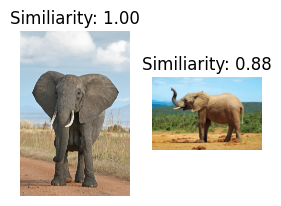

In [27]:
 get_images(new_target_path, folder_imgs_path)
